# FIR Delay Effect


## Importing Libraries


In [328]:
##Scipy functions
import scipy.io.wavfile as wv
from IPython.display import Audio
from scipy.signal import welch
from scipy.optimize import curve_fit

##Others
import numpy as np
import os
import matplotlib.pyplot as plt

# Main


## Import .wav file as signal


In [329]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "noise3.wav" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [330]:
sampleFreq, audio = wv.read(filepath) #reading audio signal here

In [331]:
sampleLen = len(audio)/sampleFreq
print(f"Sound is {sampleLen}s long")

Sound is 8.7500625s long


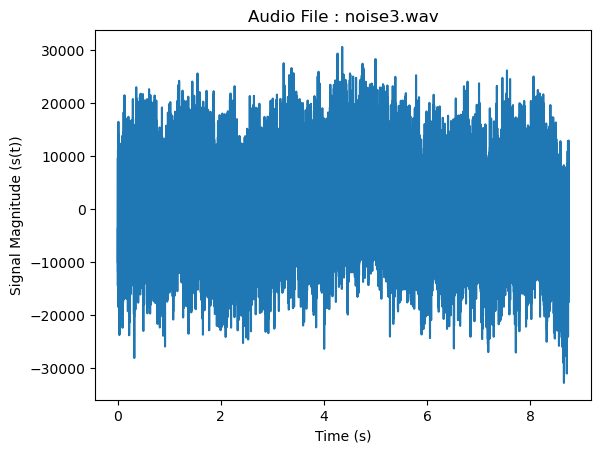

In [332]:
timeX = np.arange(0, sampleLen, 1/sampleFreq)

plt.plot(timeX, audio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}")

plt.show()

In [333]:
Audio(audio, rate=sampleFreq)

## Spectrum Density


### Periodogram


In [334]:
## Compute the fft of noise signal

fftSignal = np.fft.fft(audio)

powerSpectralDensity = (1/len(audio)) * np.abs(fftSignal) ** 2 

In [335]:
freqX = np.fft.fftfreq(len(audio), 1/sampleFreq)[:len(audio) // 2]
powerSpectralDensity = powerSpectralDensity[:len(audio) // 2]

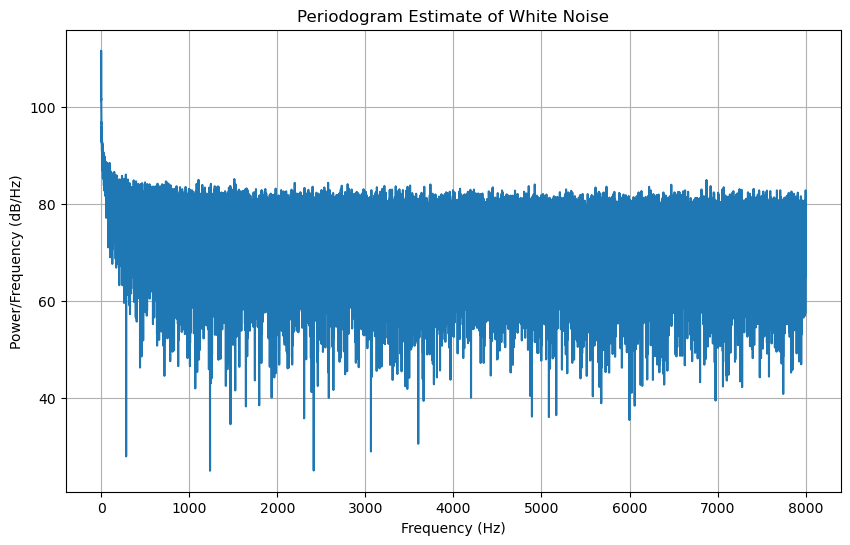

In [336]:
plt.figure(figsize=(10, 6))
plt.plot(freqX, 10 * np.log10(powerSpectralDensity))
plt.title("Periodogram Estimate of White Noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid(True)
plt.show()

### Welch


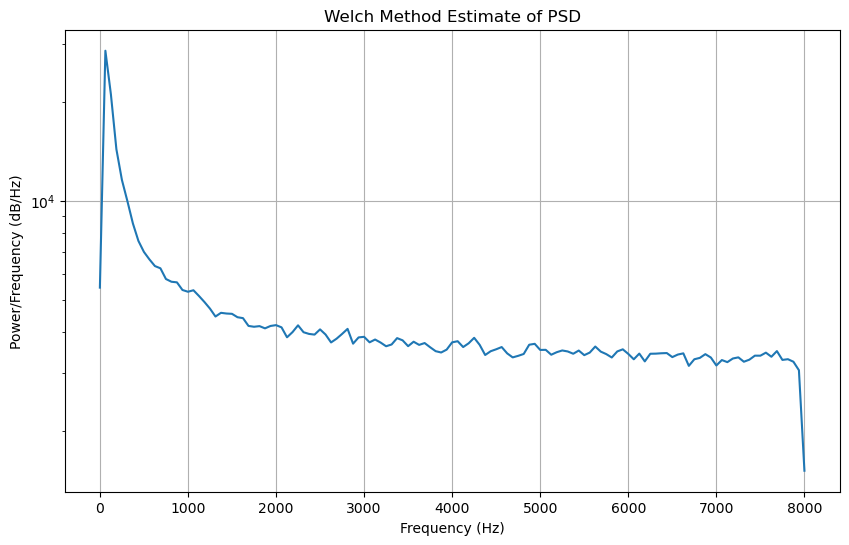

In [337]:
# Use the Welch method to estimate the PSD
freqX, psdEstimate = welch(audio, fs=sampleFreq)

# Plot the PSD estimate
plt.figure(figsize=(10, 6))
plt.semilogy(freqX, psdEstimate)
plt.title("Welch Method Estimate of PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid(True)
plt.show()


### Noise Color Estimating


In [338]:
#Using fit_curve function of scipy to determine speed of function

def functionAllure(freq, exponent, a):
    return a * freq**(-exponent)

popt, _ = curve_fit(functionAllure, freqX[1:], psdEstimate[1:], bounds = ([-2, 0], [3, np.inf]))

/tmp/ipykernel_3866/58697202.py:4: RuntimeWarning: divide by zero encountered in power
  return a * freq**(-exponent)


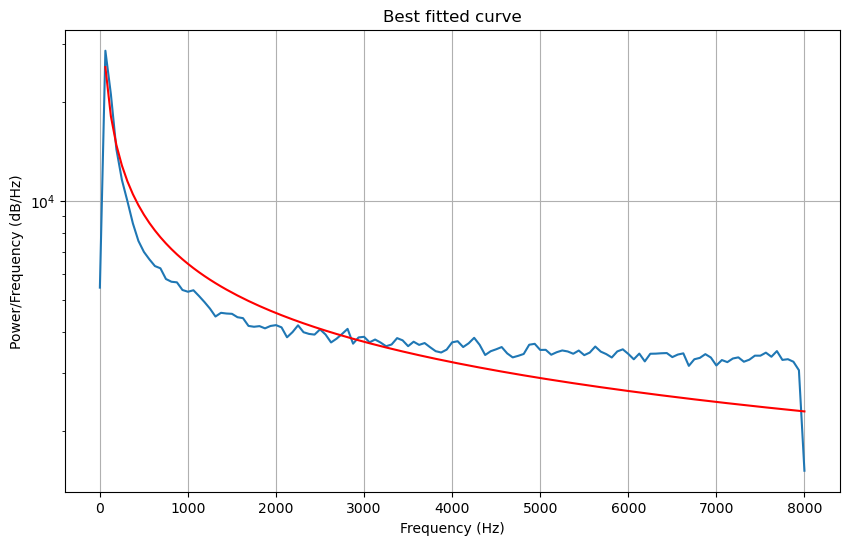

In [339]:
## Display PSD Estimator and the best fitted curve


plt.figure(figsize=(10, 6))
plt.semilogy(freqX, psdEstimate, label='PSD Estimator')
plt.semilogy(freqX, functionAllure(freqX, *popt), color='red', label='Best fitted curve')
plt.title("Best fitted curve")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid(True)
plt.show()

In [340]:
NOISE_COLOR_DICT = {'White Noise':0,
                    'Pink Noise':1,
                    'Brown Noise':2,
                    'Blue Noise':-1}

In [341]:
## Find the closest value in the dictionnary to determine the color of the noise

noiseColor, _ = min(NOISE_COLOR_DICT.items(), key=lambda dictItem: abs(dictItem[1]-popt[0]))

In [342]:
popt[0]

0.4965877219744184

In [343]:
print(f"Noise is a {noiseColor}.")

Noise is a White Noise.


## Wiener Filter


### Load Audio/Image Data
